<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week3_TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas 1: Multiple Linear Regression


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


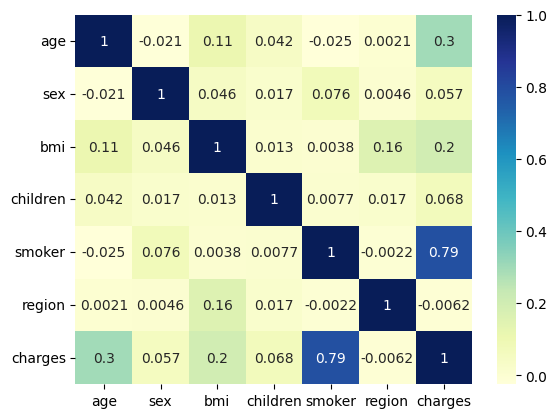

In [43]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
# Pilih kolom numerik dari data
numeric_data = data.select_dtypes(include=[float, int])

# Heatmap
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Jawab :
- Variabel bebas = age, bmi, smoker
- Variabel target = charges

In [44]:
# Variable Bebas
X = data[['age', 'smoker', 'bmi']]

# Variable Terikat
y = data[['charges']]

In [45]:
X.head()

,age,smoker,bmi
0,19,1,27.900
1,18,0,33.770
2,28,0,33.000
3,33,0,22.705
4,32,0,28.880


In [46]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

3. Lakukan feature scaling jika diperlukan.

In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

5. Latih model pada data latih dan lakukan prediksi pada data uji.

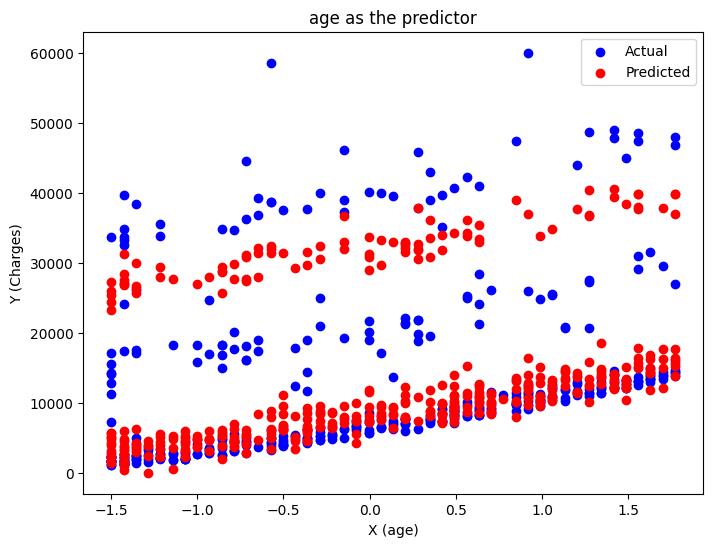

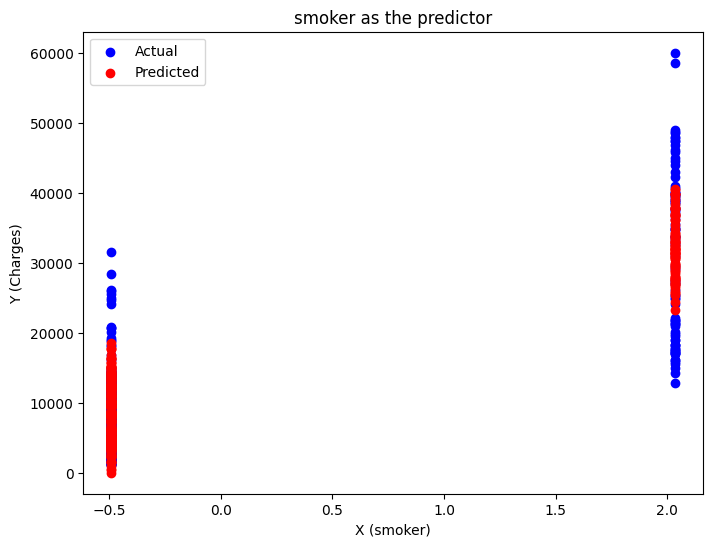

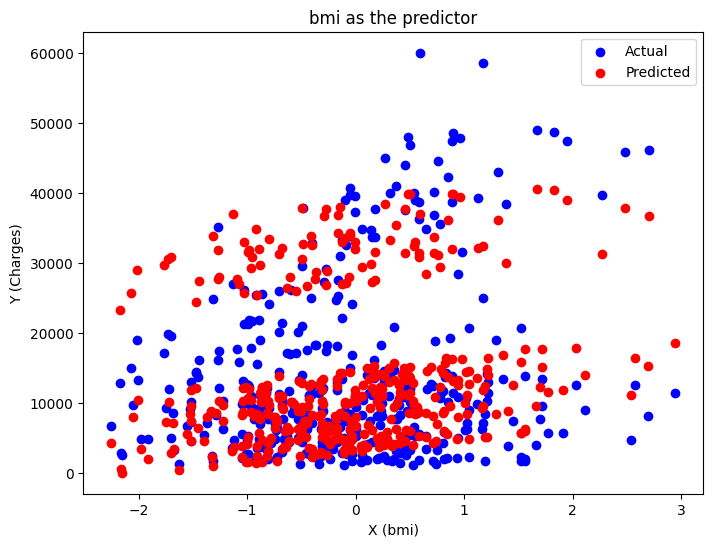

In [50]:
predictors = ['age', 'smoker', 'bmi']
colors = ['blue', 'red']

for i, predictor in enumerate(predictors):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, i], y_test, color=colors[0], label='Actual')
    plt.scatter(X_test[:, i], y_pred, color=colors[1], label='Predicted')
    plt.title(f"{predictor} as the predictor")
    plt.xlabel(f"X ({predictor})")
    plt.ylabel("Y (Charges)")
    plt.legend()
    plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-Squared: {r2}")

MAE: 3934.947395925351
MSE: 32266086.037517134
R-Squared: 0.7777782410843159
